# Plot data from Rigol DS1054Z scope

## Import the libraries

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 8]
plt.rcParams['figure.dpi'] = 300
import numpy as np
import math
import pandas as pd
import csv
from datetime import datetime 
import glob

## Import local libraries

In [2]:
from appvib import ClSigFeatures, ClSigCompUneven

## Define plot mode. 
Interactive mode is helpful for visuallizing the program execution

In [3]:
#%matplotlib widget

## Define function to read header values

In [4]:
def get_header(str_filename_in):
    """
    
    Pulls in the header information from the scope files
    
    Parameters
    ----------
    str_filename_in : string
        full file name to read
        
    Returns
    -------
    list : header values
    
    """
    
    # Read the CSV headers
    print(str_filename_in)
    file_handle = open(str_filename_in)
    csv_reader = csv.reader(file_handle)
    lst_header = next(csv_reader)
    print(lst_header)
    file_handle.close()

    return lst_header

## Define files to read

A helpful discussion on getting .csv files into Panda:
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

Choose files by entering them in a list. Clumsy, but I need to test specific cases

In [5]:
lst_filenames = ['test_001_000.csv', 'test_001_001.csv', 'test_001_002.csv']

Or all files with a given extension in the current director

In [6]:
#lst_filenames = []
#for file in glob.glob("*.csv"):
#    lst_filenames.append(file)

## Read in the first data set and visualize the results

In [7]:
help(ClSigFeatures.b_read_data_as_df)

Help on function b_read_data_as_df in module appvib:

b_read_data_as_df(self, str_filename=None)
    Read the entire file in as a pandas dataframe
    
    Parameters
    ----------
    str_filename : string
        Filename, including .csv extension,  to read. If None then filename stored
        in the class is used
    
    Returns
    --------
    lst_data : list
            pandas dataframe : dataframe with all data from the file
            numpy array, datetime : vector with date and timestamps
            numpy array, double : vector with signal sampling rates
            numpy array, double : vector with delta time interval for each signal
            list, string :  list with engineering units descriptions
            list, string : machine name



### Plot a single channel from a file

In [8]:
class_file = ClSigFeatures([1.,2.,3.], 1.)
lst_file = class_file.b_read_data_as_df(lst_filenames[2])

Extract signal and features for creation of dedicated class

In [9]:
df1 = lst_file[0]
np_dt_timestamp_ch1 = np.array([lst_file[1][0]])
np_dt_timestamp_ch2 = np.array([lst_file[1][1]])
np_d_fs = lst_file[2]
lst_str_eu = lst_file[4]
lst_str_machine_name = lst_file[5]

Instantiate a new class and populate it with the file contents

In [10]:
class1 = ClSigFeatures(df1.CH1, np_d_fs[0], dt_timestamp=np_dt_timestamp_ch1[0], str_machine_name=lst_str_machine_name[1])

Set plotting limits, size, and aspect ratio

In [11]:
plt.rcParams['figure.figsize'] = [6, 4]
class1.ylim_tb(ylim_tb_in=[-0.5, 0.5])

[-0.5, 0.5]

Plot it out

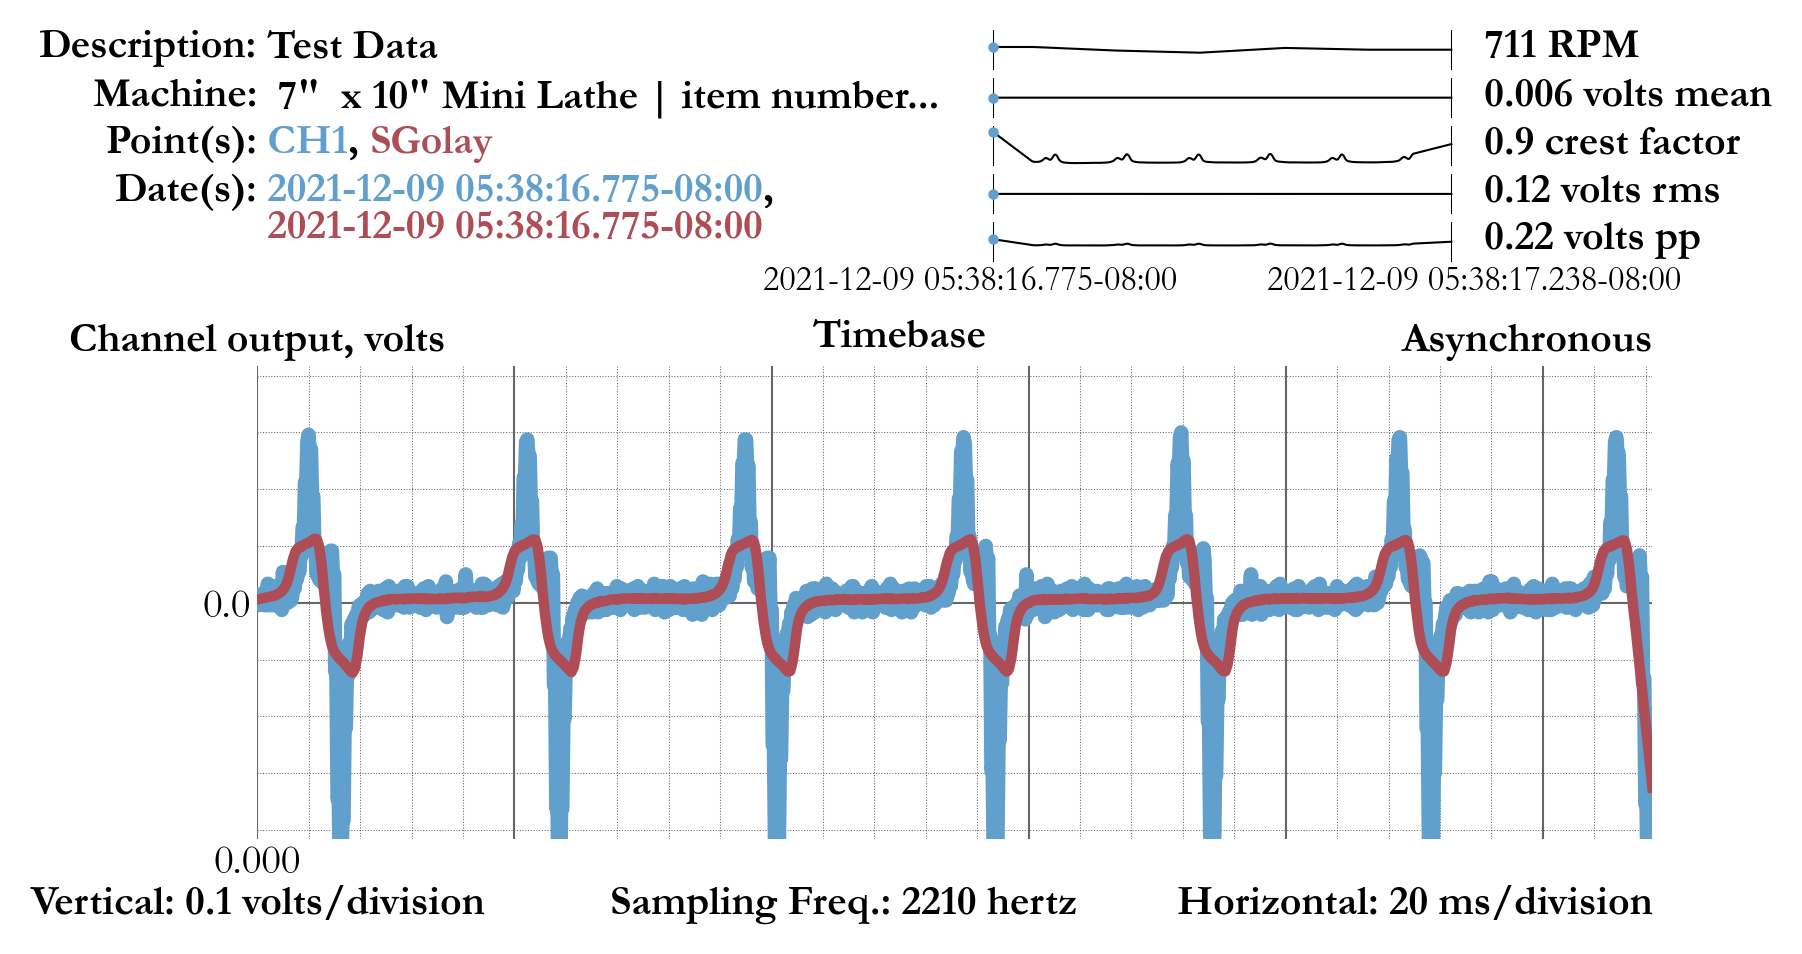

In [12]:
lst_plot_sig = class1.plt_sigs(b_plot_sg=True)
lst_plot_sig.savefig('TestPlot.pdf')

### Plot two channels from a single file
The code below builds on the single channel example. Begin by adjusting the plot display ratio so the header information fits.

In [13]:
plt.rcParams['figure.figsize'] = [6, 8]

Add the second signal to the existing object and plot both signals, along with the Savitsky-Golay filtered signal

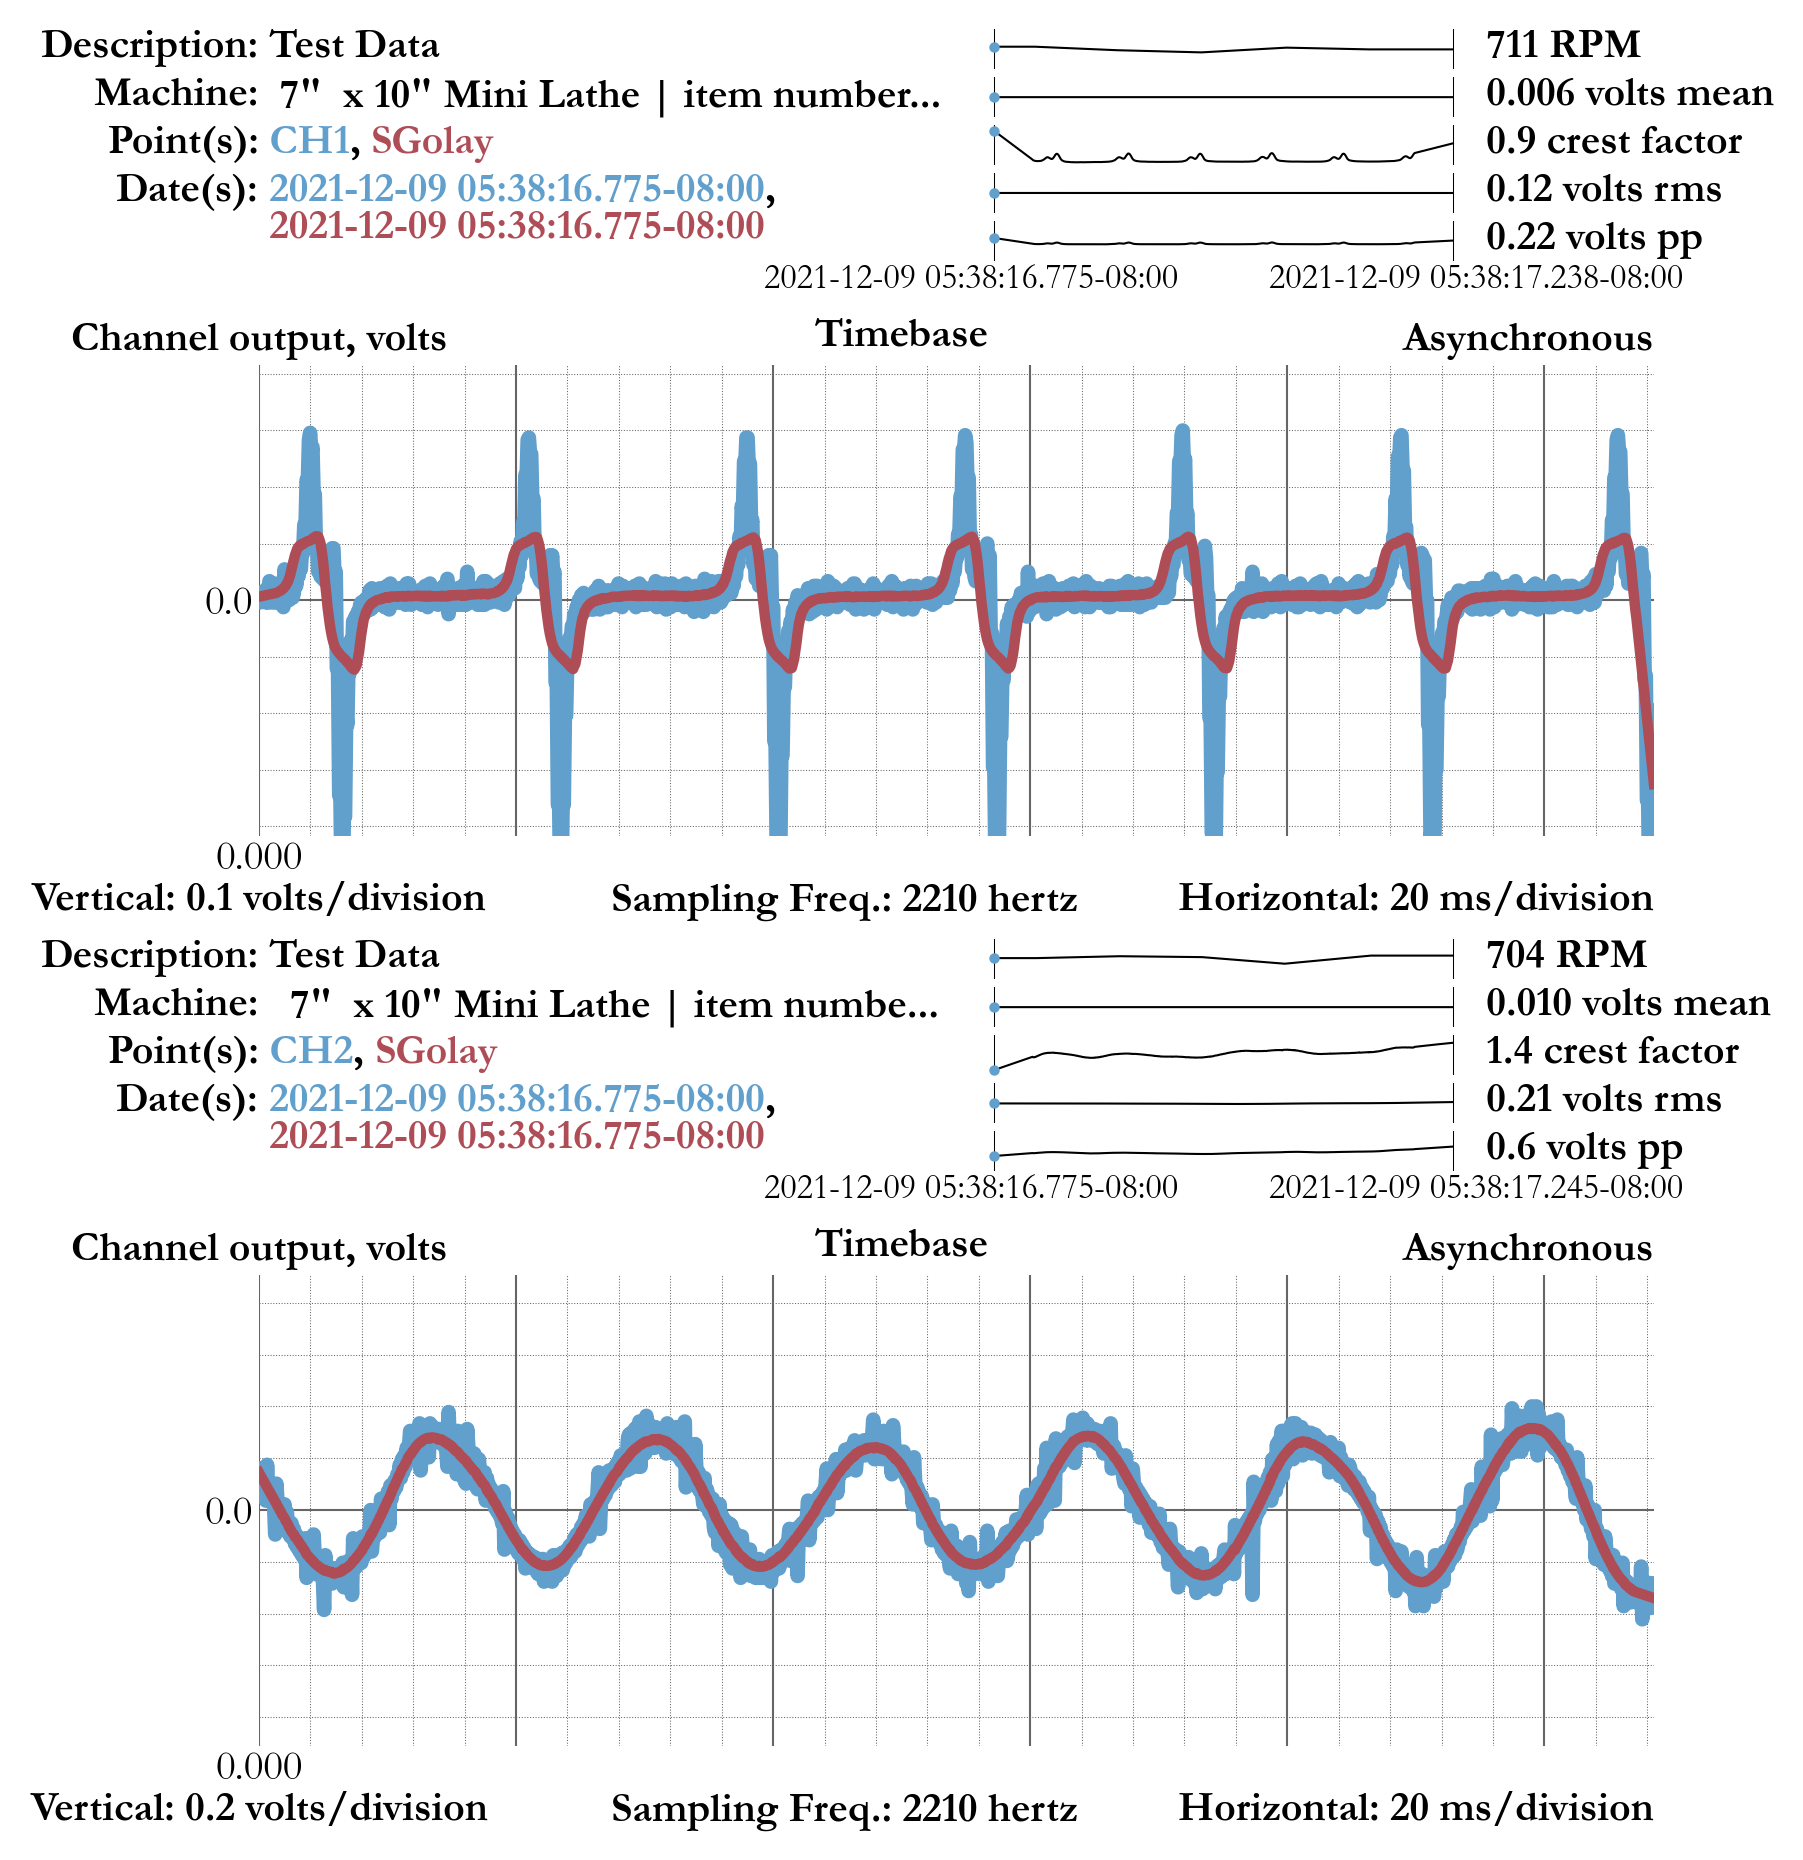

In [14]:
class1.idx_add_sig(df1.CH2, d_fs=np_d_fs[1], str_point_name='CH2', dt_timestamp=np_dt_timestamp_ch2[0], 
                    str_machine_name=lst_str_machine_name[2])    
class1.ylim_tb(ylim_tb_in=[-1.0, 1.0], idx=1)
lst_plot_sig = class1.plt_sigs(b_plot_sg=True)
lst_plot_sig.savefig('TestPlot2.pdf')